In [ ]:
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec

In [ ]:
# model = Word2Vec()

In [ ]:
# common_texts

In [ ]:
# %load_ext tensorboard

In [ ]:
import re
import datetime
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from keras.preprocessing.text import one_hot

In [ ]:
# !pip install git+https://github.com/huggingface/transformers

In [ ]:
# from transformers import DistilBertTokenizerFast

In [ ]:
# make use of TPUs if available

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
except:
    strategy = tf.distribute.get_strategy()
    
print('Number of replicas in sync: ', strategy.num_replicas_in_sync)

INFO:tensorflow:Initializing the TPU system: grpc://10.7.43.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.7.43.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas in sync:  8


In [ ]:
def lemmatize_phrase(phrase):
    # lemmatises words in a phrase, by considering their position and type
    # words such as 'swam' and 'swimming' are changed to 'swim'
    lemmatizer = WordNetLemmatizer()
    lemmatized_phrase = []

    for word, tag in pos_tag(word_tokenize(phrase)):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_phrase.append(lemmatizer.lemmatize(word, pos))

    return " ".join(lemmatized_phrase)

In [ ]:
os.mkdir('./sentiment-analysis-on-movie-reviews')

In [ ]:
# import urllib.request

# urllib.request.urlretrieve('https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data?select=train.tsv.zip', './sentiment-analysis-on-movie-reviews/train.tsv.zip')
# urllib.request.urlretrieve('https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data?select=test.tsv.zip', './sentiment-analysis-on-movie-reviews/test.tsv.zip')

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
gdd.download_file_from_google_drive(file_id='1o_vzk88Fu_n5R0NRAnpvKJOIQZY-QdqB',
                                    dest_path='./sentiment-analysis-on-movie-reviews/train.tsv',
                                    unzip=False)

gdd.download_file_from_google_drive(file_id='129VZS4q_WyJs9txnVzW85WDsCbOfbiXG',
                                    dest_path='./sentiment-analysis-on-movie-reviews/test.tsv',
                                    unzip=False)

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#this includes negative words as well, which should be removed 

neg = ["aren't", "didn't", "don't", "doesn't", "hadn't",  "hasn't", "haven't", "isn't", "no", "not", "shouldn't", "wasn't", "weren't", "wouldn't", "couldn't",
      "aren", "didn", "don", "doesn", "hadn", "hasn", "haven", "isn", "shouldn", "wasn", "weren", "wouldn", "couldn",
       "mightn't", "mightn", "mustn't", "mustn", "needn't", "needn", "shan't", "shan", "won't", "won"]

# neg = ['no', 'not', "aren", "didn", "doesn", "hadn",  "haven", "isn", "shouldn", "wasn", "weren", "wouldn"]

# due to the way the text is cleaned up, words like don't and haven't appear as don and haven.

stop_words.difference_update(neg)

# stop_words.difference_update(['no', 'not'])

# stop_words

In [ ]:
# stop_words

In [ ]:
# returns text -> rename function

def text_cleaning(text):
    if text:
        text = ' '.join(text.split('.'))
        text = re.sub('\/', ' ', text)
        text = re.sub(r'\\', ' ', text)
        text = re.sub(r'((http)\S+)', '', text)
        text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        
        text_final = [word for word in text.split() if word not in stop_words]

        if len(text_final) == 0:       # if all words are irrelevant, we may still wish to include the phrase
            text_final = [word for word in text.split()]
        return " ".join(text_final)
    return ""

In [ ]:
import time

test_input = 'my me'

st = time.time()

res = text_cleaning(test_input)

total = time.time() - st

print('{}\n{}'.format(res, total))

my me
0.0008487701416015625


In [ ]:
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [ ]:
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
# tokenizer(['Hello i', 'hello'], truncation=True, padding=True)

<h2>Data

In [ ]:
data_dir_train = './sentiment-analysis-on-movie-reviews/train.tsv'
data_dir_test = './sentiment-analysis-on-movie-reviews/test.tsv'

data_train = pd.read_csv(data_dir_train, sep='\t')
data_test = pd.read_csv(data_dir_test, sep='\t')

In [ ]:
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
# clean dataframes:
data_train['Phrase'] = data_train['Phrase'].apply(lambda x: text_cleaning(x))
data_test['Phrase'] = data_test['Phrase'].apply(lambda x: text_cleaning(x))

In [ ]:
# lemmatize data:
# lemmatises words in a phrase, by considering their position and type
# words such as 'swam' and 'swimming' are changed to 'swim'
lemmatize = False

if lemmatize:
    data_train['Phrase'] = data_train['Phrase'].apply(lambda x: lemmatize_phrase(x))
    data_test['Phrase'] = data_test['Phrase'].apply(lambda x: lemmatize_phrase(x))


In [ ]:
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
3,4,1,a,2
4,5,1,series,2


In [ ]:
#drop duplicates from train

data_train.drop_duplicates(subset = ['Phrase'], inplace = True)
data_train.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
3,4,1,a,2
5,6,1,escapades demonstrating adage good goose,2


In [ ]:
# vocabulary size

vocab = set()

phrases_train = data_train['Phrase'].to_list()
phrases_test = data_test['Phrase'].to_list()

for phrase in phrases_train:
    vocab.update(phrase.split())
for phrase in phrases_test:
    vocab.update(phrase.split())

len(vocab)

17582

In [ ]:
# length column, explain why it's important

data_train['Length'] = data_train['Phrase'].apply(lambda x: len(x.split()))
data_test['Length'] = data_test['Phrase'].apply(lambda x: len(x.split()))

In [ ]:
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length
0,1,1,series escapades demonstrating adage good goos...,1,15
1,2,1,series escapades demonstrating adage good goose,2,6
2,3,1,series,2,1
3,4,1,a,2,1
5,6,1,escapades demonstrating adage good goose,2,5


In [ ]:
maxlen = 200

Train-Test-Validation Split

In [ ]:
validation_split = 0.15
test_split = 0.15

x_train, x_test, y_train, y_test = train_test_split(
    data_train[data_train['Length']>0]['Phrase'],
    data_train[data_train['Length']>0]['Sentiment'],
    test_size = test_split,
    stratify = data_train[data_train['Length'] > 0]['Sentiment'],
    random_state = 40)

x_train, x_validation, y_train, y_validation = train_test_split(
    x_train,
    y_train,
    test_size = validation_split,
    stratify = y_train,
    random_state = 40)

# ('Length']>0 filters out 'empty' phrases, which were previously punctuation marks)

In [ ]:
x_train.shape

(61816,)

In [ ]:
# encodings_train = tokenizer(x_train.tolist(), truncation = True, padding = True)
# encodings_validation = tokenizer(x_validation.tolist(), truncation = True, padding = True)

In [ ]:
vocab_size = 20000

encodings_train = x_train.apply(lambda z: one_hot(z, vocab_size))
encodings_validation = x_validation.apply(lambda z: one_hot(z, vocab_size))
encodings_test = x_test.apply(lambda z: one_hot(z, vocab_size))

In [ ]:
max_len_in_train = len(max(encodings_train, key = lambda i: len(i)))
max_len_in_validation = len(max(encodings_validation, key = lambda i: len(i)))
max_len_in_test = len(max(encodings_test, key = lambda i: len(i)))
max_len_in_dataset = max(max_len_in_train, max_len_in_validation, max_len_in_test)

if max_len_in_dataset < maxlen:
    maxlen = max_len_in_dataset

In [ ]:
encodings_train = keras.preprocessing.sequence.pad_sequences(encodings_train, maxlen=maxlen)
encodings_validation = keras.preprocessing.sequence.pad_sequences(encodings_validation, maxlen=maxlen)
encodings_test = keras.preprocessing.sequence.pad_sequences(encodings_test, maxlen=maxlen)

Train and Validation Datasets

In [ ]:
batch_size = 512

train_dataset = tf.data.Dataset.from_tensor_slices((
    encodings_train, y_train.values)).shuffle(10000).batch(batch_size).repeat()

# train_dataset = tf.data.Dataset.from_tensor_slices((
#     encodings_train, y_train.values)).shuffle(10000).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((
    encodings_validation, y_validation.values)).shuffle(10000).batch(batch_size)

In [ ]:
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
# %tensorboard --logdir logs

Model

In [ ]:
embedding_dims = 128

with strategy.scope():
    model = Sequential()
    inputs = keras.Input(shape=(None,), dtype="int32")

    model.add(inputs)
    model.add(Embedding(vocab_size, embedding_dims, trainable=False))

    model.add(Bidirectional(LSTM(embedding_dims//2, return_sequences=True, activation='softmax')))
    # model.add(Bidirectional(LSTM(embedding_dims//2, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Bidirectional(LSTM(embedding_dims//2)))
    # model.add(Bidirectional(LSTM(embedding_dims//2, activation='softmax')))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(5, activation="sigmoid"))

    model.summary()

    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    training_st = time.time()

    history = model.fit(train_dataset,
                        batch_size=batch_size,
                        epochs=335,
                        validation_steps = len(x_validation) // batch_size,
                        steps_per_epoch = len(x_train) // batch_size,
                        validation_data = val_dataset)
    
    training_tot = time.time() - training_st

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 128)         512       
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [ ]:
import os

def save_history(filename, training_time, history_dict):
    # saves history in a csv file from a dictionary
    df_history = pd.DataFrame.from_dict(history_dict)
    df_history['training_time'] = training_time

    # create directory "history" if it doesn't exist:
    try_mkdir('./history')

    path = os.path.join('./history', filename)
    df_history.to_csv(path)

def save_history_file(path, filename, history_dict):     #for colab only
    # saves history in a csv file from a dictionary
    df_history = pd.DataFrame.from_dict(history_dict)

    path = os.path.join('./sample_data', filename)
    df_history.to_csv(path)

def try_mkdir(dir):

    try:
        os.mkdir(dir)
    except OSError:
        print("Creation of the directory %s failed" % dir)
    else:
        print("Successfully created the directory %s " % dir)

In [ ]:
model_name = 'lstm-2-apr-b512-dropout0-2-bn-dim128-emb-untr-epochs-335-2-layer-ttv-final'

In [ ]:
# hist_filename = 'history-lstm-onehot-b32-dropout0-4-bn-dim8.csv'
hist_filename = 'history-' + model_name + '.csv'

save_history(hist_filename, training_tot, history.history)

Creation of the directory ./history failed


In [ ]:
#save model
model_filename = model_name + '.h5'

model.save(os.path.join('models', model_filename))

In [ ]:
#download history and model

from google.colab import files
files.download(os.path.join('./history', hist_filename)) 
files.download(os.path.join('models', model_filename))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Confusion Matrix

In [ ]:
# inference on validation dataset

test_st = time.time()
y_validation_predicted_np = model.predict_on_batch(encodings_validation)  # numpy array

test_tot = time.time() - test_st

In [ ]:
test_tot

2.2086613178253174

In [ ]:
def get_prediction(arr):
      return arr.argmax()

In [ ]:
y_validation_predicted = np.apply_along_axis(get_prediction, 1, y_validation_predicted_np)

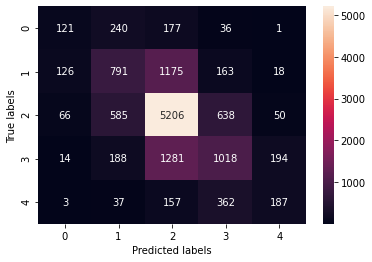

In [ ]:
import seaborn as sns

conf_matrix = confusion_matrix(y_validation, y_validation_predicted)
fig = sns.heatmap(conf_matrix, annot=True, fmt='g')
fig.set(xlabel = 'Predicted labels', ylabel = 'True labels')

plt.show()